<a href="https://colab.research.google.com/github/edugalt/scaling/blob/master/notebooks/Notebook-FittingModels-Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Urban scaling laws

- Repository: [https://github.com/edugalt/scaling](https://github.com/edugalt/scaling)

- Reference: J. C. Leitao, J.M. Miotto, M. Gerlach, and E. G. Altmann, "Is this scaling nonlinear?", Royal Society Open Science 3, 150649 (2016) [DOI: 10.1098/rsos.150649](http://rsos.royalsocietypublishing.org/content/3/7/150649).

# Loading libraries to Colab 

- Remove results from folder "_results" to ensure original computations (instead of reading from stored results)

In [1]:
!git clone https://github.com/edugalt/scaling

Cloning into 'scaling'...
remote: Enumerating objects: 896, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 896 (delta 0), reused 0 (delta 0), pack-reused 893
Receiving objects: 100% (896/896), 135.78 MiB | 11.55 MiB/s, done.
Resolving deltas: 100% (266/266), done.
Updating files: 100% (732/732), done.


In [2]:
cd /content/scaling/notebooks/

/content/scaling/notebooks


In [3]:
import sys
import numpy as np

sys.path.append("/content/scaling/src/")
sys.path.append("/content/scaling/data/")


import analysis as a
MIN_VALUE = 10**-8

%load_ext autoreload
%autoreload 2

%matplotlib inline
def summary(func):
    print(func.description,'\t Dataset:',func.dataset)
    print('Beta +- error:\t',func.beta)
    print('P-value:\t',func.p_value)
    print('BIC:\t\t',func.bic,'\n')

# Choose the dataset 

- by setting the variable dataset="name"

- Pick one of the available datasets (write 'help' as the name of the dataset for a list)

- Or, add your csv dataset to the appropriate folder:

-- New dataset with three columns (name,x,y) = (city-name, population, observable) to folder new_dataset/

-- New dataset with two columns (x,y) = (population, observable) to folder new_dataset2/

In [4]:
dataset="usa_gdp"
#Available datasets
#brazil_aids_2010,brazil_gdp_2010,brazil_externalCauses_2010,oecd_gdp,oecd_patents,usa_gdp,usa_miles,eurostat_cinema_seats,eurostat_cinema_attendance,eurostat_museum_visitors,eurostat_theaters,eurostat_libraries,uk_patents,uk_income,uk_train

#COVID-19 datasets:
#covid19_NSW, covid19_USA, covid19_brazil, covid19_chile

try:
    x=a.xy(dataset).x
    y=a.xy(dataset).y
except:
    print("Invalid Dataset Chosen. Available datasets are:\n")
    for i in a.DATABASES:
        print(i)

#Deleting all calculations for previously load new datasets
if dataset.startswith("new_dataset"):
    %rm _results/*new_dataset*

# Performing Analysis

 - Each line is one of the models, with specific constrains. Further constrains cna be fixed in each model.
 
 - This can take some minutes for the larger datasets

 - Increase the "required_successes=" parameter to increase precision (and computational time) 

## Log-Normal

In [5]:
ln = a.LogNormalAnalysis(dataset, required_successes=2)

In [6]:
ln_beta1=a.LogNormalFixedBetaAnalysis(dataset,required_successes=2)

In [7]:
ln_deltaf=a.LogNormalFixedDAnalysis(dataset,required_successes=2)

##  Gaussian

In [8]:
Gauss=a.ConstrainedDAnalysis(dataset,required_successes=2)

In [9]:
Gauss_beta1=a.ConstrainedDFixedBetaAnalysis(dataset,required_successes=2)

## Population

In [10]:
Pop=a.PopulationAnalysis(dataset,required_successes=2)

In [11]:
Pop2=a.PopulationFixedGammaAnalysis(dataset,required_successes=2)

## Least Square Fit

In [12]:
LS=a.mls_best_fit(np.log(x),np.log(y))

# Outcome of the Analysis 

### Printing the outcomes

In [13]:
summary(ln)
summary(ln_beta1)
summary(ln_deltaf)
summary(Gauss)
summary(Gauss_beta1)
summary(Pop)
summary(Pop2)

print("\n Least Square fitting:",LS)

Log normal fluctuations with a general \delta 	 Dataset: usa_gdp
Beta +- error:	 (1.112985112095562, 0.026156565104364895)
P-value:	 7.883164609868066e-06
BIC:		 7331.906940035647 

Log normal fluctuations with \beta = 1 	 Dataset: usa_gdp
Beta +- error:	 (1.0, 0.0)
P-value:	 2.842613321647731e-13
BIC:		 7400.484344545411 

Log normal fluctuations with \delta = 1 	 Dataset: usa_gdp
Beta +- error:	 (1.1127655008015638, 0.06125202206921292)
P-value:	 2.9873365212437333e-07
BIC:		 7328.629283473116 

Gaussian fluctuations with free \delta 	 Dataset: usa_gdp
Beta +- error:	 (1.115962005652085, 0.02410129843011141)
P-value:	 1.6552582515706e-56
BIC:		 7443.727699080898 

Gaussian fluctuations with \beta = 1 and free \delta 	 Dataset: usa_gdp
Beta +- error:	 (1.0, 0.0)
P-value:	 9.009520299258393e-56
BIC:		 7508.130531288362 

People model with free \delta 	 Dataset: usa_gdp
Beta +- error:	 (1.1210314399746837, 0.02077986617381453)
P-value:	 0.0
BIC:		 282634900.0949037 

People model with \

### Plotting data 

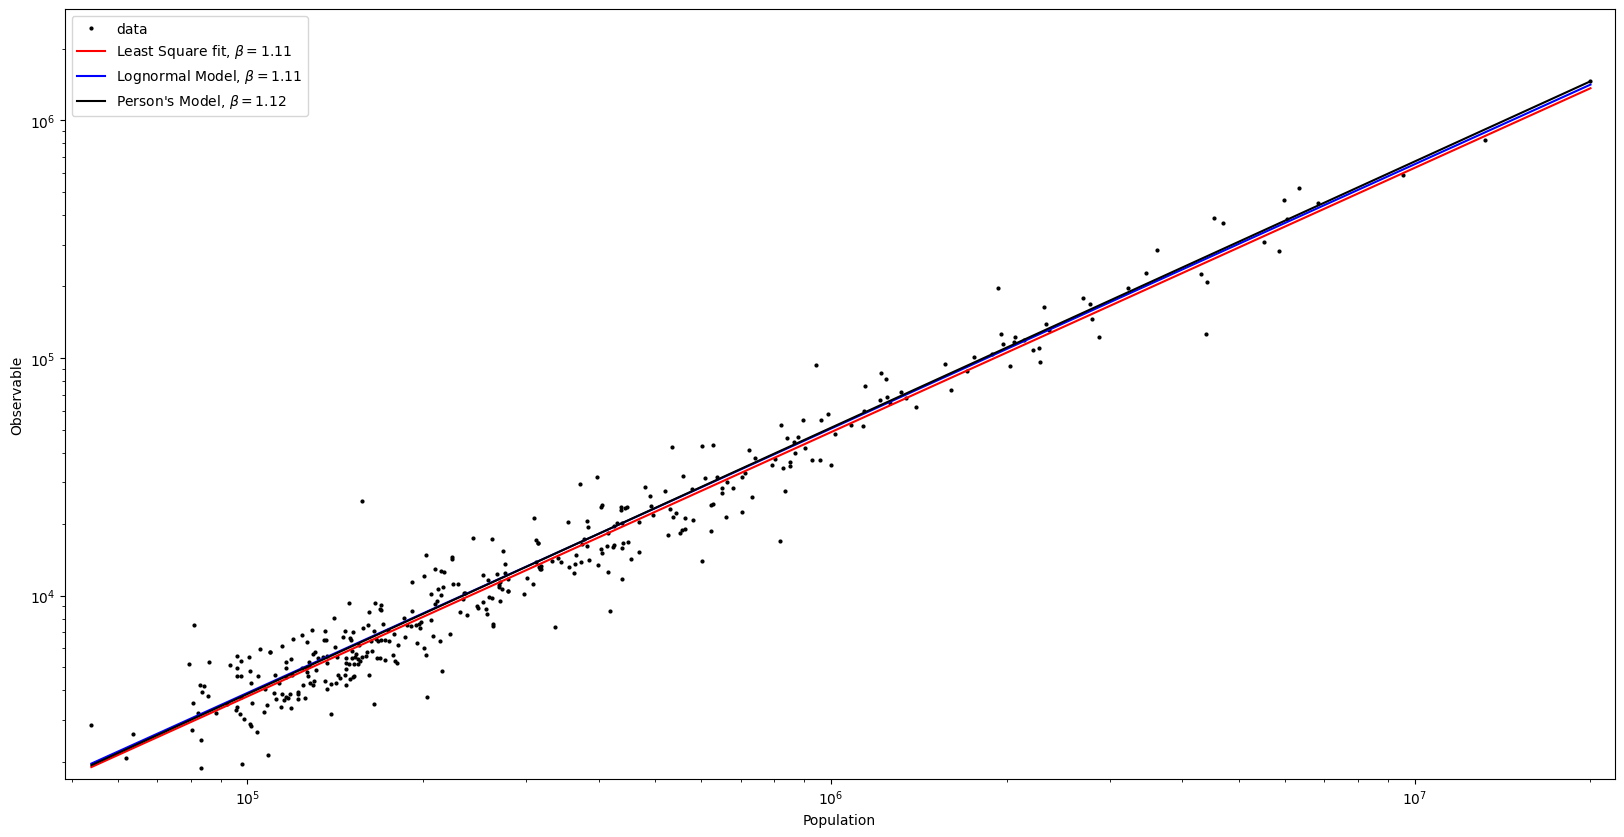

In [14]:
from matplotlib.pyplot import *
figure(figsize=(20,10))
xscale("log")
yscale("log")
xlim(0.9*min(x),1.1*max(x))
ylim(0.9*min(y),2*max(y))
plot(x, y, "o", ms=2,color="black",label="data")
plot(x, np.exp(LS[2])*x**LS[0], "-", ms=2,color="red",label=r"Least Square fit, $\beta=$"+str(LS[0])[:4])
plot(x, ln.params[0]*x**ln.params[1], "-", ms=2,color="blue",label=r"Lognormal Model, $\beta=$"+str(ln.params[1])[:4])
# People's model
Y=np.sum(y)
betaP=Pop.params[0]
Z=np.sum(np.power(x,betaP))
plot(x, Y*x**betaP/Z, "-", ms=2,color="black",label=r"Person's Model, $\beta=$"+str(betaP)[:4])
xlabel("Population")
ylabel("Observable")
legend(loc=0)
show()